In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

In [5]:
lst = []
for i in range(6):
    dat = np.load('/home/yashjonjale/Documents/intern_proj/Model/rough/final_data_' + str(1000*(2**i)) + '.npy')
    arr = np.array(dat)
    lst.append(arr)

In [6]:
# split the data into training and testing data
import xgboost as xgb
from sklearn.model_selection import train_test_split


dmat_lst_train = []
dmat_lst_test = []

for i in range(6):
    X = lst[i][:, 3:]
    y = lst[i][:, 2]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    dmat_lst_test.append(xgb.DMatrix(data=X_test, label=y_test))
    dmat_lst_train.append(xgb.DMatrix(data=X_train, label=y_train))
    




In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


param = {
    'max_depth': 3,  # the maximum depth of each tree
    # 'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'reg:squarederror',  # error function for regression
    'eval_metric': 'rmse'  # evaluation metric
}

err_mat = np.zeros((6, 5))
coeff_corr_mat = np.zeros((6, 5))
r2_mat = np.zeros((6, 5))
nr = np.zeros(5)
sizes = np.zeros(6)

for i in range(6):
    sizes[i] = 1000*(2**i)
    for j in range(5):        
        num_round = 20*(2**j)  # the number of training iterations
        nr[j] = num_round
        bst = xgb.train(param, dmat_lst_train[i], num_round)
        preds = bst.predict(dmat_lst_test[i])
        #find the error
        error = mean_squared_error(dmat_lst_test[i].get_label(), preds)
        coeff_corr = np.corrcoef(dmat_lst_test[i].get_label(), preds)
        r2 = r2_score(dmat_lst_test[i].get_label(), preds)
        err_mat[i, j] = error
        coeff_corr_mat[i, j] = coeff_corr[0, 1]
        r2_mat[i, j] = r2
        
          
            

/home/yashjonjale/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [17:24:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yashjonjale/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [17:24:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yashjonjale/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [17:24:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yashjonjale/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [17:24:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yashjonjale/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [17:24:28] WARNING: /workspace/src/learner.cc:742: 


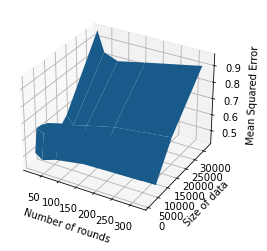

In [9]:
# plot a surface plot of the error
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(nr, sizes)
ax.plot_surface(X, Y, err_mat)
ax.set_xlabel('Number of rounds')
ax.set_ylabel('Size of data')
ax.set_zlabel('Mean Squared Error')
plt.show()


In [11]:
# Now make the above plot more interactive
import plotly.graph_objs as go
import plotly.offline as py

data = [go.Surface(z=err_mat, x=nr, y=sizes)]
layout = go.Layout(title='Error surface plot',
                   scene=dict(xaxis=dict(title='Number of rounds'),
                              yaxis=dict(title='Size of data'),
                              zaxis=dict(title='Mean Squared Error')))
fig = go.Figure(data=data, layout=layout)
py.plot(fig, filename='error_surface.html')






'error_surface.html'

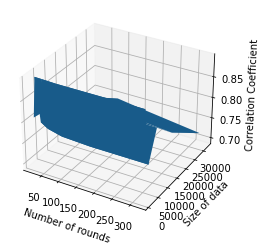

'correlation_coeff_surface.html'

In [12]:
# do the same thing for the correlation coefficient
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(nr, sizes)
ax.plot_surface(X, Y, coeff_corr_mat)
ax.set_xlabel('Number of rounds')
ax.set_ylabel('Size of data')
ax.set_zlabel('Correlation Coefficient')

plt.show()

# Now make the above plot more interactive
data = [go.Surface(z=coeff_corr_mat, x=nr, y=sizes)]
layout = go.Layout(title='Correlation Coefficient surface plot',
                   scene=dict(xaxis=dict(title='Number of rounds'),
                              yaxis=dict(title='Size of data'),
                              zaxis=dict(title='Correlation Coefficient')))
fig = go.Figure(data=data, layout=layout)
py.plot(fig, filename='correlation_coeff_surface.html')
    

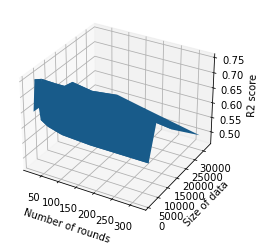

'r2_score_surface.html'

In [13]:
## do the same thing for the r2 score
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(nr, sizes)
ax.plot_surface(X, Y, r2_mat)
ax.set_xlabel('Number of rounds')
ax.set_ylabel('Size of data')
ax.set_zlabel('R2 score')

plt.show()

# Now make the above plot more interactive
data = [go.Surface(z=r2_mat, x=nr, y=sizes)]
layout = go.Layout(title='R2 score surface plot',
                   scene=dict(xaxis=dict(title='Number of rounds'),
                              yaxis=dict(title='Size of data'),
                              zaxis=dict(title='R2 score')))
fig = go.Figure(data=data, layout=layout)
py.plot(fig, filename='r2_score_surface.html')
